In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import math
import numpy as np
from pylab import rcParams
import matplotlib
from numpy import trapz
import pandas as pd

In [2]:
rcParams["figure.figsize"]=10, 2.5
matplotlib.rcParams["figure.facecolor"] = "0.9"
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 15

In [3]:
NMR= pd.read_csv("./Calibration 50umol.csv", header = None, skiprows = 0, sep = "\t")

In [4]:
NMR.columns = ["CS", "intensity", "1"]
print(NMR)

             CS  intensity   1
0      -5.01651   0.116883 NaN
1      -5.01613   0.599831 NaN
2      -5.01574  -0.527815 NaN
3      -5.01536  -1.797270 NaN
4      -5.01498  -1.386840 NaN
...         ...        ...  ..
52412  15.02010   3.636180 NaN
52413  15.02040   3.950710 NaN
52414  15.02080   4.881040 NaN
52415  15.02120   5.702090 NaN
52416  15.02160   4.745260 NaN

[52417 rows x 3 columns]


In [8]:
#integeration minimum chemcial shift value of DCM
P1 = [n for n, i in enumerate (NMR.CS) if i>5.4][0]
print("P1 =", P1)
P2 = [n for n, i in enumerate (NMR.CS) if i>5.45][0]
print("P2 =", P2)

P1 = 27248
P2 = 27379


In [9]:
Average_P1 = (NMR.intensity[P1-2]+NMR.intensity[P1-1]+NMR.intensity[P1]+NMR.intensity[P1+1]+NMR.intensity[P1+2])/5
Average_P2 = (NMR.intensity[P2-2]+NMR.intensity[P2-1]+NMR.intensity[P2]+NMR.intensity[P2+1]+NMR.intensity[P2+2])/5
Intensity_min_DCM = (Average_P1+Average_P2)/2
NMR_intensity_corr_DCM = NMR.intensity-Intensity_min_DCM

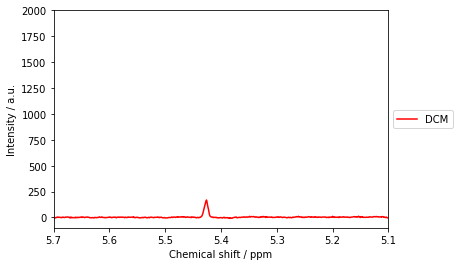

In [10]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_DCM, "r", label='DCM')
ax.set_xlim(5.7, 5.1)
ax.set_ylim(-100, 2000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
Peak_int_NMR_DCM = trapz (NMR_intensity_corr_DCM[P1:P2], dx = 1)
print("DCM peak area =", Peak_int_NMR_DCM)

DCM peak area = 3476.82215089


In [12]:
#integeration minimum chemcial shift value of formate
P3 = [n for n, i in enumerate (NMR.CS) if i>8.35][0]
print("P3 =", P3)
P4 = [n for n, i in enumerate (NMR.CS) if i>8.45][0]
print("P4 =", P4)

P3 = 34965
P4 = 35226


In [13]:
Average_P3 = (NMR.intensity[P3-2]+NMR.intensity[P3-1]+NMR.intensity[P3]+NMR.intensity[P3+1]+NMR.intensity[P3+2])/5
Average_P4 = (NMR.intensity[P4-2]+NMR.intensity[P4-1]+NMR.intensity[P4]+NMR.intensity[P4+1]+NMR.intensity[P4+2])/5
Intensity_min_formate = (Average_P3+Average_P4)/2
NMR_intensity_corr_formate = NMR.intensity-Intensity_min_formate

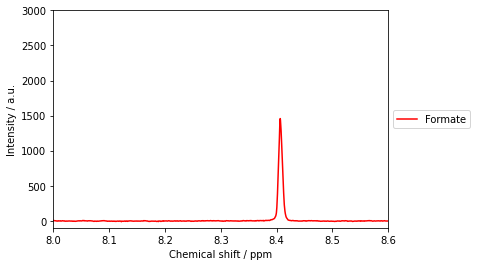

In [14]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_formate, "r", label='Formate')
ax.set_xlim(8.0, 8.6)
ax.set_ylim(-100, 3000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
Peak_int_NMR_formate = trapz (NMR_intensity_corr_formate[P3:P4], dx = 1)
print("Formate peak area =", Peak_int_NMR_formate)

Formate peak area = 32483.0262009


In [16]:
Ratio = Peak_int_NMR_formate/Peak_int_NMR_DCM
print("Formate/DCM =", Ratio)

Formate/DCM = 9.34273448315007


In [17]:
Peak_int_sum = []
Peak_int_sum.append(Peak_int_NMR_formate)
Peak_int_sum.append(Peak_int_NMR_DCM)
Peak_int_sum.append(Ratio)

In [18]:
name = ["formate peak area", "DCM peak area", "formate/DCM ratio"]

In [19]:
output_data = pd.DataFrame({"name":name, "peak_area":Peak_int_sum})

In [20]:
output_data

,name,peak_area
0,formate peak area,32483.026201
1,DCM peak area,3476.822151
2,formate/DCM ratio,9.342734
